<a href="https://colab.research.google.com/github/10598672/CA1_10598672/blob/main/CA1_10598672.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# import libraries
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Collect data
url = 'https://gateway.daft.ie/old/v1/listings'

headers = {'authority': 'gateway.daft.ie',
'method': 'POST',
'path': '/old/v1/listings',
'scheme': 'https',
'accept': 'application/json',
'accept-encoding': 'gzip, deflate, br',
'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
'brand': 'daft',
'cache-control': 'no-cache, no-store',
'content-length': '181',
'content-type': 'application/json',
'expires': '0',
'origin': 'https://www.daft.ie',
'platform': 'web',
'pragma': 'no-cache',
'referer': 'https://www.daft.ie/',
'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="96", "Google Chrome";v="96"',
'sec-ch-ua-mobile': '?0',
'sec-ch-ua-platform': '"Windows"',
'sec-fetch-dest': 'empty',
'sec-fetch-mode': 'cors',
'sec-fetch-site': 'same-site',
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36',
'version': '0.1.1534'}

data = '{"section":"residential-for-sale","filters":[{"name":"adState","values":["published"]}],"andFilters":[],"ranges":[],"paging":{"from":"20","pageSize":"20"},"geoFilter":{},"terms":""}'

In [3]:
# data - JSON formatting
json_data = json.loads(data)
json_data

{'andFilters': [],
 'filters': [{'name': 'adState', 'values': ['published']}],
 'geoFilter': {},
 'paging': {'from': '20', 'pageSize': '20'},
 'ranges': [],
 'section': 'residential-for-sale',
 'terms': ''}

In [4]:
resp = requests.post(url, data = data, headers = headers)

In [5]:
# check response is correct
resp

<Response [200]>

In [6]:
# checking contents of variable resp
resp.content

b'{"listings":[{"listing":{"id":2743383,"title":"Archers Wood, Delgany, Co. Wicklow","seoTitle":"Archers Wood, Delgany, Co. Wicklow","sections":["Property","New Homes","Houses"],"saleType":["For Sale"],"featuredLevel":"FEATURED","publishDate":1642064643000,"price":"Price on Application","abbreviatedPrice":"POA","numBedrooms":"2, 3, 4 & 5 bed","propertyType":"Houses","daftShortcode":"93178242","seller":{"sellerId":10912,"name":"Sherry Fitzgerald New Homes","phone":"01 6671888","profileImage":"https://photos.cdn.dsch.ie/ZGZiYmZkZDE4MGRmMGRmNWJmZmI2MmNjM2UzODc5OTW9sV6jTpnUQOv9JlXd3pDyaHR0cHM6Ly9zMy1ldS13ZXN0LTEuYW1hem9uYXdzLmNvbS9tZWRpYW1hc3Rlci1zM2V1L2EvYS9hYTIyNjM3NGFhOTVmYmUyYmNkM2FlMjdmMmM5NjVkMy5qcGd8fHx8fHwxMDB4MTAwfHx8fA==","branch":"Cairn Homes","address":"7 Grand Canal,\\r\\nGrand Canal Street Lower,\\r\\nDublin,\\r\\nD02 KW81.","standardLogo":"https://photos.cdn.dsch.ie/OWM2M2UzZjU0NGYyYmI0YjAyMGVmNGQzZGU1YTFjN2QRMMlzu13dNzuPvS6tR9JcaHR0cHM6Ly9zMy1ldS13ZXN0LTEuYW1hem9uYXdzLmNvbS

In [8]:
json_response = json.loads(resp.content)

In [9]:
# listing keys
json_response.keys()

dict_keys(['listings', 'showcaseListings', 'paging', 'dfpTargetingValues', 'breadcrumbs', 'canonicalUrl', 'mapView', 'savedSearch'])

In [10]:
# creating listings variable from
listings = json_response['listings']

In [ ]:
listings

In [12]:
# creating a data frame from data collected
df = pd.json_normalize(listings)
df

,savedAd,listing.id,listing.title,listing.seoTitle,listing.sections,listing.saleType,listing.featuredLevel,listing.publishDate,listing.price,listing.abbreviatedPrice,listing.numBedrooms,listing.propertyType,listing.daftShortcode,listing.seller.sellerId,listing.seller.name,listing.seller.phone,listing.seller.profileImage,listing.seller.branch,listing.seller.address,listing.seller.standardLogo,listing.seller.squareLogo,listing.seller.backgroundColour,listing.seller.licenceNumber,listing.seller.sellerType,listing.seller.showContactForm,listing.media.images,listing.media.totalImages,listing.media.hasVideo,listing.media.hasVirtualTour,listing.media.hasBrochure,listing.ber.rating,listing.point.type,listing.point.coordinates,listing.seoFriendlyPath,listing.newHome.totalUnitTypes,listing.newHome.subUnits,listing.newHome.about,listing.newHome.developmentName,listing.pageBranding.standardLogo,listing.pageBranding.backgroundColour,listing.pageBranding.rectangleLogo,listing.category,listing.state,listing.premierPartner,listing.media.brochure,listing.newHome.brochure,listing.pageBranding.squareLogo,listing.pageBranding.squareLogos,listing.sticker,listing.numBathrooms,listing.seller.alternativePhone,listing.ber.code,listing.ber.epi,listing.floorArea.unit,listing.floorArea.value,listing.propertySize,listing.seller.phoneWhenToCall,listing.newHome.tagLine,listing.newHome.location
0,False,2743383,"Archers Wood, Delgany, Co. Wicklow","Archers Wood, Delgany, Co. Wicklow","[Property, New Homes, Houses]",[For Sale],FEATURED,1642064643000,Price on Application,POA,"2, 3, 4 & 5 bed",Houses,93178242,10912,Sherry Fitzgerald New Homes,01 6671888,https://photos.cdn.dsch.ie/ZGZiYmZkZDE4MGRmMGR...,Cairn Homes,"7 Grand Canal,\r\nGrand Canal Street Lower,\r\...",https://photos.cdn.dsch.ie/OWM2M2UzZjU0NGYyYmI...,https://photos.cdn.dsch.ie/OTAyZTY4Y2IxMzAxNDU...,#b62025,Exempt - Property Developer,BRANDED_AGENT,True,[{'size720x480': 'https://photos.cdn.dsch.ie/N...,31,False,True,False,A2,Point,"[-6.08256378583016, 53.12815660102234]",/new-home-for-sale/archers-wood-delgany-co-wic...,7.0,"[{'id': 2743326, 'price': 'Price on Applicatio...",Archers Wood is brought to you by Cairn Homes ...,Archers Wood,https://photos.cdn.dsch.ie/OWM2M2UzZjU0NGYyYmI...,#b62025,https://photos.cdn.dsch.ie/OWM2M2UzZjU0NGYyYmI...,New Homes,PUBLISHED,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,1528083,"Graydon, Newcastle, Co. Dublin","Graydon, Newcastle, Co. Dublin","[Property, New Homes, Houses]",[For Sale],FEATURED,1642063980000,"From €310,000",€310k+,"2, 3 & 4 bed",Houses,9172161,10912,"Graydon, Newcastle, Co. Dublin",01 667 1888,https://photos.cdn.dsch.ie/ZGZiYmZkZDE4MGRmMGR...,Cairn Homes,"7 Grand Canal,\r\nGrand Canal Street Lower,\r\...",https://photos.cdn.dsch.ie/OWM2M2UzZjU0NGYyYmI...,https://photos.cdn.dsch.ie/OTAyZTY4Y2IxMzAxNDU...,#b62025,Exempt - Property Developer,BRANDED_AGENT,True,[{'size720x480': 'https://photos.cdn.dsch.ie/Y...,39,False,False,True,A2,Point,"[-6.496535629858317, 53.29928158820707]",/new-home-for-sale/graydon-newcastle-co-dublin...,5.0,"[{'id': 3526065, 'price': '€310,000', 'numBedr...","At Cairn, the customer is at the heart of ever...",Graydon,https://photos.cdn.dsch.ie/MzE3YTI5OWIxZTY1NDI...,#a82b22,https://photos.cdn.dsch.ie/MzE3YTI5OWIxZTY1NDI...,New Homes,PUBLISHED,False,[{'url': 'https://s3-eu-west-1.amazonaws.com/m...,https://s3-eu-west-1.amazonaws.com/mediamaster...,https://photos.cdn.dsch.ie/OTAyZTY4Y2IxMzAxNDU...,[https://photos.cdn.dsch.ie/OTAyZTY4Y2IxMzAxND...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,3576129,"Mercer Vale, Cherrywood, Co. Dublin","Mercer Vale, Cherrywood, Co. Dublin","[Property, New Homes, Houses]",[For Sale],FEATURED,1639740345000,Price on Application,POA,"2, 3 & 4 bed",Houses,96514513,10912,Hooke & MacDonald,01 6610100,NaN,Cairn Homes,"7 Grand Canal,\r\nGrand Canal Street Lower,\r\...",https://photos.cdn.dsch.ie/OWM2M2UzZjU0NGYyYmI...,https://photos.cdn.dsch.ie/OTAyZTY4Y2IxMzAxNDU...

In [13]:
# iterating columns to check all columns in the dataframe
for col in df.columns:
  print(col)

savedAd
listing.id
listing.title
listing.seoTitle
listing.sections
listing.saleType
listing.featuredLevel
listing.publishDate
listing.price
listing.abbreviatedPrice
listing.numBedrooms
listing.propertyType
listing.daftShortcode
listing.seller.sellerId
listing.seller.name
listing.seller.phone
listing.seller.profileImage
listing.seller.branch
listing.seller.address
listing.seller.standardLogo
listing.seller.squareLogo
listing.seller.backgroundColour
listing.seller.licenceNumber
listing.seller.sellerType
listing.seller.showContactForm
listing.media.images
listing.media.totalImages
listing.media.hasVideo
listing.media.hasVirtualTour
listing.media.hasBrochure
listing.ber.rating
listing.point.type
listing.point.coordinates
listing.seoFriendlyPath
listing.newHome.totalUnitTypes
listing.newHome.subUnits
listing.newHome.about
listing.newHome.developmentName
listing.pageBranding.standardLogo
listing.pageBranding.backgroundColour
listing.pageBranding.rectangleLogo
listing.category
listing.state
l

In [14]:
# Transformations - drop columns not required in analysis 
for col in df.columns:
  if 'savedAd' in col:
        del df[col]
for col in df.columns:
  if 'listing.seoTitle' in col:
        del df[col]
for col in df.columns:
  if 'listing.sections' in col:
        del df[col]
for col in df.columns:
  if 'listing.saleType' in col:
        del df[col]
for col in df.columns:
  if 'listing.featuredLevel' in col:
        del df[col]
for col in df.columns:
  if 'listing.publishDate' in col:
        del df[col]
for col in df.columns:
  if 'listing.abbreviatedPrice' in col:
        del df[col]
for col in df.columns:
  if 'listing.daftShortcode' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.profileImage' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.address' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.standardLogo' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.squareLogo' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.backgroundColour' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.seller.licenceNumber' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.showContactForm' in col:
        del df[col]
for col in df.columns:
  if 'listing.media.images' in col:
        del df[col]
for col in df.columns:
  if 'listing.media.totalImages' in col:
        del df[col]
for col in df.columns:
  if 'listing..media.hasVideos' in col:
        del df[col]
for col in df.columns:
  if 'listing.media.hasVirtualTour' in col:
        del df[col]
for col in df.columns:
  if 'listing.media.hasBrochure' in col:
        del df[col]
for col in df.columns:
  if 'listing.ber.code' in col:
        del df[col]
for col in df.columns:
  if 'listing.ber.epi' in col:
        del df[col]
for col in df.columns:
  if 'listing.floorArea.unit' in col:
        del df[col]
for col in df.columns:
  if 'listing.floorArea.value' in col:
        del df[col]
for col in df.columns:
  if 'listing.point.type' in col:
        del df[col]
for col in df.columns:
  if 'listing.point.coordinates' in col:
        del df[col]
for col in df.columns:
  if 'listing.seoFriendlyPath' in col:
        del df[col]
for col in df.columns:
  if 'listing.pageBranding.standardLogo' in col:
        del df[col]
for col in df.columns:
  if 'listing.pageBranding.squareLogo' in col:
        del df[col]
for col in df.columns:
  if 'listing.pageBranding.backgroundColour' in col:
        del df[col]
for col in df.columns:
  if 'listing.pageBranding.squareLogos' in col:
        del df[col]
for col in df.columns:
  if 'listing.pageBranding.rectangleLogo' in col:
        del df[col]
for col in df.columns:
  if 'listing.category' in col:
        del df[col]
for col in df.columns:
  if 'listing.state' in col:
        del df[col]
for col in df.columns:
  if 'listing.premierPartner' in col:
        del df[col]
for col in df.columns:
  if 'listing.sticker' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.alternativePhone' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.phoneWhenToCall' in col:
        del df[col]
for col in df.columns:
  if 'listing.newHome.totalUnitTypes' in col:
        del df[col]
for col in df.columns:
  if 'listing.newHome.subUnits' in col:
        del df[col]
for col in df.columns:
  if 'listing.newHome.developmentName' in col:
        del df[col]
for col in df.columns:
  if 'listing.newHome.location' in col:
        del df[col]
for col in df.columns:
  if 'listing.newHome.about' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.licenceNumber' in col:
        del df[col]
for col in df.columns:
  if 'listing.media.hasVideo' in col:
        del df[col]
for col in df.columns:
  if 'listing.seller.sellerType' in col:
        del df[col]
for col in df.columns:
  if 'NumBathrooms' in col:
        del df[col]
for col in df.columns:
  if 'listing.media.brochure' in col:
        del df[col]
for col in df.columns:
  if 'listing.newHome.tagLine' in col:
        del df[col]
for col in df.columns:
  if 'listing.newHome.brochure' in col:
        del df[col]
for col in df.columns:
  if 'listing.numBathrooms' in col:
        del df[col]

In [15]:
# Transformations - change column names of df
df.columns = ['ID', 'Address', 'Price', 'NumBedrooms',	'PropertyType', 'SellerId',	'SellerName', 'SellerPhone', 'SellerBranch', 'Ber.Rating',	'PropertySize']
df

,ID,Address,Price,NumBedrooms,PropertyType,SellerId,SellerName,SellerPhone,SellerBranch,Ber.Rating,PropertySize
0,2743383,"Archers Wood, Delgany, Co. Wicklow",Price on Application,"2, 3, 4 & 5 bed",Houses,10912,Sherry Fitzgerald New Homes,01 6671888,Cairn Homes,A2,NaN
1,1528083,"Graydon, Newcastle, Co. Dublin","From €310,000","2, 3 & 4 bed",Houses,10912,"Graydon, Newcastle, Co. Dublin",01 667 1888,Cairn Homes,A2,NaN
2,3576129,"Mercer Vale, Cherrywood, Co. Dublin",Price on Application,"2, 3 & 4 bed",Houses,10912,Hooke & MacDonald,01 6610100,Cairn Homes,A2,NaN
3,3534753,"One to Nine Priory, Delgany, Co. Wicklow","From €725,000",3 & 4 bed,Houses,10912,Kelly Walsh,01 664 5500,Cairn Homes,A2,NaN
4,3465072,"3 Railway Place, High Street, Co. Cork","€190,000",2 Bed,Townhouse,10189,Dan Howard MIPAV TRV PSR 006328,021 4248654,Dan Howard & Co. Ltd,E1,56 m²
5,3658516,"331 Crumlin Road, Crumlin, Dublin 12","€385,000",3 Bed,Semi-D,887,Rodney Elliott,01 4594433,BROE Auctioneers,SI_666,NaN
6,3655766,"18 Castlelawn, Tulla Road, Ennis, Co. Clare","€275,000",5 Bed,Detached,2549,Jason Pyne,065 6867866,Sherry FitzGerald McMahon,D1,132 m²
7,3675467,"15 Abington, Malahide, Co. Dublin","€1,675,000",4 Bed,Detached,7499,John Brophy Assoc. SCSI RICS,01 845 7988,"Brophy Estates, Auctioneers and Estate Agents",C1,250 m²
8,1410802,"Barnhall Meadows, Leixlip, Co. Kildare",Price on Application,3 & 4 bed,Houses,9088,Coonan Property,01 6286128,Glenveagh Homes,A3,NaN
9,3287879,"Riversend, Effernock, Trim, Co. Meath",Price on Application,"2, 3, 4 & 5 bed",Houses,9088,Raymond Potterton,046-9027666,Glenveagh Homes,A3,NaN


In [16]:
# Transformations - look for null values
df.shape
df.isnull()

,ID,Address,Price,NumBedrooms,PropertyType,SellerId,SellerName,SellerPhone,SellerBranch,Ber.Rating,PropertySize
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,True


In [17]:
df.isnull().sum

<bound method DataFrame.sum of        ID  Address  Price  ...  SellerBranch  Ber.Rating  PropertySize
0   False    False  False  ...         False       False          True
1   False    False  False  ...         False       False          True
2   False    False  False  ...         False       False          True
3   False    False  False  ...         False       False          True
4   False    False  False  ...         False       False         False
5   False    False  False  ...         False       False          True
6   False    False  False  ...         False       False         False
7   False    False  False  ...         False       False         False
8   False    False  False  ...         False       False          True
9   False    False  False  ...         False       False          True
10  False    False  False  ...         False       False          True
11  False    False  False  ...         False       False          True
12  False    False  False  ...         False  

In [18]:
# show how many null values are in the df
df.isnull().sum().sum()

17

In [19]:
# replace null value with 0
df = df.fillna(value = 0)
df

,ID,Address,Price,NumBedrooms,PropertyType,SellerId,SellerName,SellerPhone,SellerBranch,Ber.Rating,PropertySize
0,2743383,"Archers Wood, Delgany, Co. Wicklow",Price on Application,"2, 3, 4 & 5 bed",Houses,10912,Sherry Fitzgerald New Homes,01 6671888,Cairn Homes,A2,0
1,1528083,"Graydon, Newcastle, Co. Dublin","From €310,000","2, 3 & 4 bed",Houses,10912,"Graydon, Newcastle, Co. Dublin",01 667 1888,Cairn Homes,A2,0
2,3576129,"Mercer Vale, Cherrywood, Co. Dublin",Price on Application,"2, 3 & 4 bed",Houses,10912,Hooke & MacDonald,01 6610100,Cairn Homes,A2,0
3,3534753,"One to Nine Priory, Delgany, Co. Wicklow","From €725,000",3 & 4 bed,Houses,10912,Kelly Walsh,01 664 5500,Cairn Homes,A2,0
4,3465072,"3 Railway Place, High Street, Co. Cork","€190,000",2 Bed,Townhouse,10189,Dan Howard MIPAV TRV PSR 006328,021 4248654,Dan Howard & Co. Ltd,E1,56 m²
5,3658516,"331 Crumlin Road, Crumlin, Dublin 12","€385,000",3 Bed,Semi-D,887,Rodney Elliott,01 4594433,BROE Auctioneers,SI_666,0
6,3655766,"18 Castlelawn, Tulla Road, Ennis, Co. Clare","€275,000",5 Bed,Detached,2549,Jason Pyne,065 6867866,Sherry FitzGerald McMahon,D1,132 m²
7,3675467,"15 Abington, Malahide, Co. Dublin","€1,675,000",4 Bed,Detached,7499,John Brophy Assoc. SCSI RICS,01 845 7988,"Brophy Estates, Auctioneers and Estate Agents",C1,250 m²
8,1410802,"Barnhall Meadows, Leixlip, Co. Kildare",Price on Application,3 & 4 bed,Houses,9088,Coonan Property,01 6286128,Glenveagh Homes,A3,0
9,3287879,"Riversend, Effernock, Trim, Co. Meath",Price on Application,"2, 3, 4 & 5 bed",Houses,9088,Raymond Potterton,046-9027666,Glenveagh Homes,A3,0


In [20]:
# Sort df by descending order price
df.sort_values('Price', inplace=True)
df

,ID,Address,Price,NumBedrooms,PropertyType,SellerId,SellerName,SellerPhone,SellerBranch,Ber.Rating,PropertySize
19,2603470,"The Hawthorns , Arden Road, Tullamore, Co. Offaly","From €250,000",2 & 3 bed,Houses,9088,Damien Dillon - The Hawthorns - DMPC,087 7370902,Glenveagh Homes,A3,0
12,3617108,"Glebe Manor Estate, Whitegate, Co. Cork","From €289,000","3, 4 & 5 bed",Houses,10637,Fergus Hennessy,0858723085,Hennessy Properties,A2,0
1,1528083,"Graydon, Newcastle, Co. Dublin","From €310,000","2, 3 & 4 bed",Houses,10912,"Graydon, Newcastle, Co. Dublin",01 667 1888,Cairn Homes,A2,0
14,2553452,"Ruxton Oaks, Blackcastle, Navan, Co. Meath","From €310,000",3 bed,Houses,9088,Raymond Potterton,046-9027666,Glenveagh Homes,A3,0
15,1431568,"Silver Banks, Stamullen, Co. Meath","From €330,000",3 & 4 bed,Houses,9088,Raymond Potterton,046-9027666,Glenveagh Homes,A3,0
16,1118075,"Ledwill Park, Ledwill Park, Kilcock, Co. Kildare","From €520,000","2, 3, 4 & 5 bed",Houses,9088,Ciara Brassington,+353 1 667 1888,Glenveagh Homes,A3,0
3,3534753,"One to Nine Priory, Delgany, Co. Wicklow","From €725,000",3 & 4 bed,Houses,10912,Kelly Walsh,01 664 5500,Cairn Homes,A2,0
17,3278990,"Belin Woods, Athgarvan Road, Kilbelin, Newbrid...",Price on Application,"2, 3 & 4 bed",Houses,9088,Carol Mulligan - Knight Frank,01 237 4500,Glenveagh Homes,A3,0
13,3500013,"Walker's Gate, Kildare, Co. Kildare",Price on Application,"2, 3 & 4 bed",Houses,9088,Oisin Shortt,+35345832020,Glenveagh Homes,A3,0
11,1398811,"Barnhall Meadows, Leixlip, Co. Kildare",Price on Application,3 & 4 bed,Houses,9088,Darren Clendennen - Savills,01 618 1300,Glenveagh Homes,A3,0


In [21]:
# Sort df by descending order price
df.sort_values('Ber.Rating', inplace=True)
df

,ID,Address,Price,NumBedrooms,PropertyType,SellerId,SellerName,SellerPhone,SellerBranch,Ber.Rating,PropertySize
12,3617108,"Glebe Manor Estate, Whitegate, Co. Cork","From €289,000","3, 4 & 5 bed",Houses,10637,Fergus Hennessy,0858723085,Hennessy Properties,A2,0
1,1528083,"Graydon, Newcastle, Co. Dublin","From €310,000","2, 3 & 4 bed",Houses,10912,"Graydon, Newcastle, Co. Dublin",01 667 1888,Cairn Homes,A2,0
2,3576129,"Mercer Vale, Cherrywood, Co. Dublin",Price on Application,"2, 3 & 4 bed",Houses,10912,Hooke & MacDonald,01 6610100,Cairn Homes,A2,0
3,3534753,"One to Nine Priory, Delgany, Co. Wicklow","From €725,000",3 & 4 bed,Houses,10912,Kelly Walsh,01 664 5500,Cairn Homes,A2,0
0,2743383,"Archers Wood, Delgany, Co. Wicklow",Price on Application,"2, 3, 4 & 5 bed",Houses,10912,Sherry Fitzgerald New Homes,01 6671888,Cairn Homes,A2,0
19,2603470,"The Hawthorns , Arden Road, Tullamore, Co. Offaly","From €250,000",2 & 3 bed,Houses,9088,Damien Dillon - The Hawthorns - DMPC,087 7370902,Glenveagh Homes,A3,0
9,3287879,"Riversend, Effernock, Trim, Co. Meath",Price on Application,"2, 3, 4 & 5 bed",Houses,9088,Raymond Potterton,046-9027666,Glenveagh Homes,A3,0
10,3287158,"Ravens Mill, Rolestown, Rolestown, Co. Dublin",Price on Application,3 & 4 bed,Houses,9088,David Quirke - Flynn & Assoc.,018901141,Glenveagh Homes,A3,0
8,1410802,"Barnhall Meadows, Leixlip, Co. Kildare",Price on Application,3 & 4 bed,Houses,9088,Coonan Property,01 6286128,Glenveagh Homes,A3,0
18,3581939,"Castleland Park, Balbriggan, Co. Dublin",Price on Application,3 & 4 bed,Houses,9088,Riona McCaughey - Knight Frank,086 142 8950,Glenveagh Homes,A3,0


In [22]:
df['Price'].sort_values()

19           From €250,000
12           From €289,000
1            From €310,000
14           From €310,000
15           From €330,000
16           From €520,000
3            From €725,000
17    Price on Application
13    Price on Application
11    Price on Application
18    Price on Application
8     Price on Application
10    Price on Application
9     Price on Application
0     Price on Application
2     Price on Application
7               €1,675,000
4                 €190,000
6                 €275,000
5                 €385,000
Name: Price, dtype: object

In [23]:
df = df[df['Price'] != 'Price on Application']
df

,ID,Address,Price,NumBedrooms,PropertyType,SellerId,SellerName,SellerPhone,SellerBranch,Ber.Rating,PropertySize
12,3617108,"Glebe Manor Estate, Whitegate, Co. Cork","From €289,000","3, 4 & 5 bed",Houses,10637,Fergus Hennessy,0858723085,Hennessy Properties,A2,0
1,1528083,"Graydon, Newcastle, Co. Dublin","From €310,000","2, 3 & 4 bed",Houses,10912,"Graydon, Newcastle, Co. Dublin",01 667 1888,Cairn Homes,A2,0
3,3534753,"One to Nine Priory, Delgany, Co. Wicklow","From €725,000",3 & 4 bed,Houses,10912,Kelly Walsh,01 664 5500,Cairn Homes,A2,0
19,2603470,"The Hawthorns , Arden Road, Tullamore, Co. Offaly","From €250,000",2 & 3 bed,Houses,9088,Damien Dillon - The Hawthorns - DMPC,087 7370902,Glenveagh Homes,A3,0
16,1118075,"Ledwill Park, Ledwill Park, Kilcock, Co. Kildare","From €520,000","2, 3, 4 & 5 bed",Houses,9088,Ciara Brassington,+353 1 667 1888,Glenveagh Homes,A3,0
15,1431568,"Silver Banks, Stamullen, Co. Meath","From €330,000",3 & 4 bed,Houses,9088,Raymond Potterton,046-9027666,Glenveagh Homes,A3,0
14,2553452,"Ruxton Oaks, Blackcastle, Navan, Co. Meath","From €310,000",3 bed,Houses,9088,Raymond Potterton,046-9027666,Glenveagh Homes,A3,0
7,3675467,"15 Abington, Malahide, Co. Dublin","€1,675,000",4 Bed,Detached,7499,John Brophy Assoc. SCSI RICS,01 845 7988,"Brophy Estates, Auctioneers and Estate Agents",C1,250 m²
6,3655766,"18 Castlelawn, Tulla Road, Ennis, Co. Clare","€275,000",5 Bed,Detached,2549,Jason Pyne,065 6867866,Sherry FitzGerald McMahon,D1,132 m²
4,3465072,"3 Railway Place, High Street, Co. Cork","€190,000",2 Bed,Townhouse,10189,Dan Howard MIPAV TRV PSR 006328,021 4248654,Dan Howard & Co. Ltd,E1,56 m²


In [24]:
numeric_list_value = []
for price in df['Price']:
  num_price = price.split('€')[1]
  numeric_list_value.append(num_price)

In [25]:
numeric_list_value

['289,000',
 '310,000',
 '725,000',
 '250,000',
 '520,000',
 '330,000',
 '310,000',
 '1,675,000',
 '275,000',
 '190,000',
 '385,000']

In [26]:
df['Price']

12    From €289,000
1     From €310,000
3     From €725,000
19    From €250,000
16    From €520,000
15    From €330,000
14    From €310,000
7        €1,675,000
6          €275,000
4          €190,000
5          €385,000
Name: Price, dtype: object

In [27]:
df['numeric_list_value'] = numeric_list_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df['numeric_list_value'].head()

12    289,000
1     310,000
3     725,000
19    250,000
16    520,000
Name: numeric_list_value, dtype: object

In [33]:
df['numeric_list_value'] = df['numeric_list_value'].str.replace(r'\D', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df['numeric_list_value'].head(2)

12    289000
1     310000
Name: numeric_list_value, dtype: object

In [35]:
df['numeric_list_value'] = df['numeric_list_value'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df.sort_values('numeric_list_value', ascending=False).head()

,ID,Address,Price,NumBedrooms,PropertyType,SellerId,SellerName,SellerPhone,SellerBranch,Ber.Rating,PropertySize,numeric_list_value
7,3675467,"15 Abington, Malahide, Co. Dublin","€1,675,000",4 Bed,Detached,7499,John Brophy Assoc. SCSI RICS,01 845 7988,"Brophy Estates, Auctioneers and Estate Agents",C1,250 m²,1675000
3,3534753,"One to Nine Priory, Delgany, Co. Wicklow","From €725,000",3 & 4 bed,Houses,10912,Kelly Walsh,01 664 5500,Cairn Homes,A2,0,725000
16,1118075,"Ledwill Park, Ledwill Park, Kilcock, Co. Kildare","From €520,000","2, 3, 4 & 5 bed",Houses,9088,Ciara Brassington,+353 1 667 1888,Glenveagh Homes,A3,0,520000
5,3658516,"331 Crumlin Road, Crumlin, Dublin 12","€385,000",3 Bed,Semi-D,887,Rodney Elliott,01 4594433,BROE Auctioneers,SI_666,0,385000
15,1431568,"Silver Banks, Stamullen, Co. Meath","From €330,000",3 & 4 bed,Houses,9088,Raymond Potterton,046-9027666,Glenveagh Homes,A3,0,330000


In [37]:
# Transformations - sort by most expensive county to buy a house and visualize
df['Address'].value_counts()

Graydon, Newcastle, Co. Dublin                       1
Ledwill Park, Ledwill Park, Kilcock, Co. Kildare     1
331 Crumlin Road, Crumlin, Dublin 12                 1
3 Railway Place, High Street, Co. Cork               1
The Hawthorns , Arden Road, Tullamore, Co. Offaly    1
15 Abington, Malahide, Co. Dublin                    1
Silver Banks, Stamullen, Co. Meath                   1
18 Castlelawn, Tulla Road, Ennis, Co. Clare          1
Ruxton Oaks, Blackcastle, Navan, Co. Meath           1
Glebe Manor Estate, Whitegate, Co. Cork              1
One to Nine Priory, Delgany, Co. Wicklow             1
Name: Address, dtype: int64

In [39]:
county = []
for address in df['Address']:
  address_county = address.rsplit()[-1]
  county.append(address_county)

In [40]:
df['county'] = county

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
# Transformations - avg price of houses in Ireland oer listing data 
df.groupby('county')['numeric_list_value'].mean()

county
12         385000
Clare      275000
Cork       239500
Dublin     992500
Kildare    520000
Meath      320000
Offaly     250000
Wicklow    725000
Name: numeric_list_value, dtype: int64

In [61]:
df['county'] = df['county'].replace(['Clare', 'Cork', 'Dublin', 'Kildare', 'Meath', 'Offaly', 'Wicklow', '12'],
                                   ['Clare', 'Cork', 'Dublin', 'Kildare', 'Meath', 'Offaly', 'Wicklow', 'Dublin'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
numeric_list_value

['289,000',
 '310,000',
 '725,000',
 '250,000',
 '520,000',
 '330,000',
 '310,000',
 '1,675,000',
 '275,000',
 '190,000',
 '385,000']

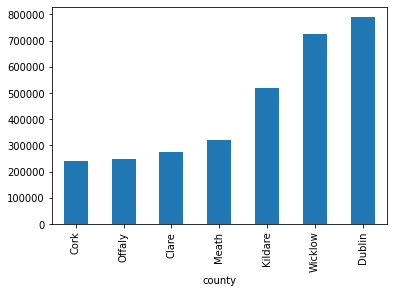

In [62]:
# Visualization
df.groupby('county')['numeric_list_value'].mean().sort_values().plot(kind='bar')

In [69]:
list(df['county'].value_counts().index)

['Dublin', 'Meath', 'Cork', 'Offaly', 'Kildare', 'Clare', 'Wicklow']

In [70]:
df.columns

Index(['ID', 'Address', 'Price', 'NumBedrooms', 'PropertyType', 'SellerId',
       'SellerName', 'SellerPhone', 'SellerBranch', 'Ber.Rating',
       'PropertySize', 'numeric_list_value', 'county'],
      dtype='object')

In [71]:
df['SellerName'].value_counts()

Raymond Potterton                       2
Damien Dillon - The Hawthorns - DMPC    1
Graydon, Newcastle, Co. Dublin          1
Fergus Hennessy                         1
Kelly Walsh                             1
Rodney Elliott                          1
Jason Pyne                              1
John Brophy Assoc. SCSI RICS            1
Dan Howard MIPAV TRV PSR 006328         1
Ciara Brassington                       1
Name: SellerName, dtype: int64

In [ ]:
# installing MS ODBC SQL
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

In [ ]:
!pip install pypyodbc
import pypyodbc

In [ ]:
cursor = connection.cursor()
SQLCommand = ("CREATE DATABASE Listings;")
cursor.execute(SQLCommand)
print('done')

connection.close()

In [ ]:
# connecting to database server by logging in:
connection=connection = pypyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
'Server=168.63.54.68;'
'Database=Listing;'
'encrypt=yes;'
'TrustServerCertificate=yes;'
'UID=sa;'
'PWD=Ireland01',autocommit = True)

In [ ]:
# creating database tables 
CreateListing = """CREATE TABLE [Listing] (
  [Address] Varchar (350),
  [Price] Varchar (15),
  [NumBedrooms] Varchar 20,
  [PropertyType] Varchar (150),
  PRIMARY KEY ([ID])
);"""

CreateSeller = """ CREATE TABLE [Seller](
  [SellerName] Varchar (50),
  [SellerPhone] Varchar (25),
  [SellerBranch] Varhar (150),
  PRIMARY KEY ([SellerID])
);"""

cursor = connection.cursor()
cursor.execute(CreateListing)
print("listing created")
cursor.execute(CreateSeller)
print("seller created")

In [ ]:
alterListing="""ALTER table Listing 
Add FOREIGN KEY (SellerID) references Seller (SellerID)"""

InsertListing = """insert into Listing 
values ('Glebe Manor Estate' , 'Whitegate', 'Co. Cork', '€289,000', '3,4,5', 'House'),
		('Graydon' , 'Newcastle', 'Co. Dublin', '€310,000', '2,3,4', 'House'),
    ('One to Nine Priory' , 'Delgany', 'Co. Wicklow', '€725,000', '3,4', 'House'),
    ('The Hawthorns' , 'Arden Road', 'Tullamore', 'Co. Offaly', '€250,000', '2,3', 'House'),
    ('Ledwill Park' , 'Kilcock', 'Co. Kildare', '€520,000', '2,3,4,5', 'House'),
    ('Silver Banks' , 'Stamullen', 'Co. Meath', '€330,000', '3,4', 'House'),
    ('Ruxton Oaks, Blackcastle' , 'Navan', 'Co. Meath', '€310,000', '3', 'House'),
    ('15 Abbington' , 'Malahide', 'Co. Dublin', '€1,675,000', '4', 'Detached'),
    ('18 Castlelawn' , 'Tulla Road', 'Ennis', 'Co. Clare', '€275,000', '5', 'Detached'),
    ('3 Railway Place' , 'High Street', 'Co. Cork', '€190,000', '2', 'Townhouse'),
    ('331 Crumlin Road' , 'Crumlin', 'Dublin 12', '€385,000', '3', 'Semi-detached') """

InsertSeller = """insert into Seller
values ('Fergus Hennesy' ,'0858723085', 'Hennessy Properties'),
('Graydon' ,'016671888', Cairn Homes'),
('Kelly Walsh' ,'016645500', 'Cairn Homes'),
('Damien Dillon, The Hawthorns' ,'0877370902', 'Glenveagh Homes'),
('Ciara Brassington' ,'016671888', 'Glenveagh Homes'),
('Raymond Potterton' ,'0858723085', 'Glenveagh Homes'),
('Raymond Potterton' ,'0858723085', 'Glenveagh Homes'),
('John Brophy' ,'018457988', 'Brphy Estates, Auctioneers and Estate Agents'),
('Jason Pyne' ,'0656867866', 'Sherry Fitzgerald McMahon'),
('Dan Howard' ,'0214248654', 'Dan Howard & Co. Ltd'),
('Rodney Elliott' ,'014594433', 'BROE Auctioneers') """

SelectAllListing = """select * from Listing"""
SelectAllSeller = """select * from Seller"""

cursor = connection.cursor()
cursor.execute(insertListing)
print("designer inserted")
cursor.execute(insertSeller)
print("customer inserted")